In [106]:
import pandas as pd
import nltk
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [107]:

dfFr = pd.read_csv("./french_messages.csv" ,header=None)
dfFr.columns = ['label' , 'text']
dfFr.head(5)

,label,text
0,ham,Je suis bloqué dans les embouteillages…
1,ham,Peux-tu acheter du pain en rentrant ?
2,spam,Vous avez été sélectionné pour un héritage de ...
3,ham,Repose-toi bien et prends soin de toi !
4,spam,Achetez maintenant et recevez un bonus de 100€...


In [108]:
dfAng = pd.read_csv("./spam.csv" , encoding="ISO-8859-1" , header=None)
dfAng.head(5)

,0,1,2,3,4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [109]:
dfAng = dfAng.iloc[:,0:2]
dfAng.columns = ['label' , 'text']
dfAng.head(5)

,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [110]:
dfAb= pd.read_csv('./arabic_messages.csv', header= None)
dfAb.columns = ['label' , 'text']
dfAb.head(5)

,label,text
0,ham,مرحبًا، أنا متأخر بسبب الزحام المروري. أراك قر...
1,ham,مرحبًا، هل لديك أخبار عن خالد؟
2,ham,شكرًا لمساعدتك، كان ذلك رائعًا!
3,spam,عرض لا يصدق! جربه بنفسك الآن!
4,spam,فاتورتك الهاتفية في انتظار السداد، قم بالدفع هنا.


In [111]:
print(dfAb.shape , ' ',dfAng.shape, ' ', dfFr.shape)

(3000, 2)   (5572, 2)   (4500, 2)


In [112]:
dfAng.describe()

,label,text
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


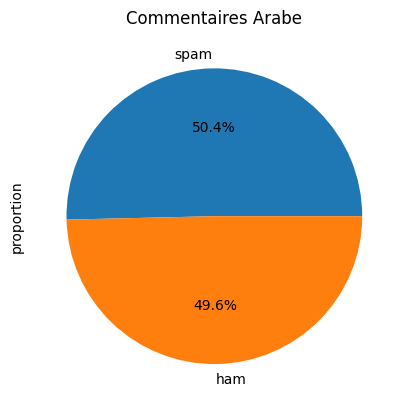

In [113]:
dfAb.label.value_counts(normalize= True).plot.pie(autopct ='%1.1f%%')
plt.title('Commentaires Arabe')
plt.show()

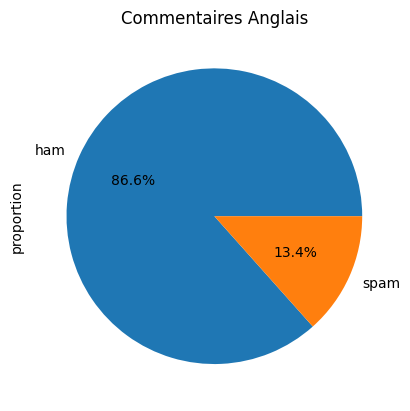

In [114]:
dfAng.label.value_counts(normalize= True).plot.pie(autopct ='%1.1f%%')
plt.title('Commentaires Anglais')
plt.show()

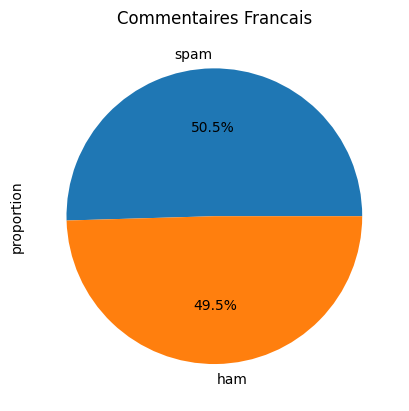

In [115]:
dfFr.label.value_counts(normalize= True).plot.pie(autopct ='%1.1f%%')
plt.title('Commentaires Francais')
plt.show()

In [116]:
import string
punct = string.punctuation

punct = punct + '؟'

In [117]:
def removePunc(text) : 
    text_np = "".join([char for char in text if char not in punct])
    return text_np

In [118]:
dfAng['text_np'] = dfAng['text'].apply(lambda x : removePunc(x.lower()))
dfAb['text_np'] = dfAb['text'].apply(lambda x : removePunc(x.lower()))
dfFr['text_np'] = dfFr['text'].apply(lambda x : removePunc(x.lower()))

In [119]:
dfAng.head(5)

,label,text,text_np
0,ham,"Go until jurong point, crazy.. Available only ...",go until jurong point crazy available only in ...
1,ham,Ok lar... Joking wif u oni...,ok lar joking wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entry in 2 a wkly comp to win fa cup fina...
3,ham,U dun say so early hor... U c already then say...,u dun say so early hor u c already then say
4,ham,"Nah I don't think he goes to usf, he lives aro...",nah i dont think he goes to usf he lives aroun...


In [120]:
from nltk.tokenize import word_tokenize

In [121]:
def tokenize(text):
    tokens = word_tokenize(text)
    return tokens

In [122]:
dfAng['text_tokens'] = dfAng['text_np'].apply(lambda x : tokenize(x))
dfAb['text_tokens'] = dfAb['text_np'].apply(lambda x : tokenize(x))
dfFr['text_tokens'] = dfFr['text_np'].apply(lambda x : tokenize(x))

In [123]:
dfAng.head(5)

,label,text,text_np,text_tokens
0,ham,"Go until jurong point, crazy.. Available only ...",go until jurong point crazy available only in ...,"[go, until, jurong, point, crazy, available, o..."
1,ham,Ok lar... Joking wif u oni...,ok lar joking wif u oni,"[ok, lar, joking, wif, u, oni]"
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entry in 2 a wkly comp to win fa cup fina...,"[free, entry, in, 2, a, wkly, comp, to, win, f..."
3,ham,U dun say so early hor... U c already then say...,u dun say so early hor u c already then say,"[u, dun, say, so, early, hor, u, c, already, t..."
4,ham,"Nah I don't think he goes to usf, he lives aro...",nah i dont think he goes to usf he lives aroun...,"[nah, i, dont, think, he, goes, to, usf, he, l..."


In [124]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [125]:
from nltk.corpus import stopwords
stopw = stopwords.words('english') + stopwords.words('french') + stopwords.words('arabic')

stopw

['a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 'her',
 'here',
 'hers',
 'herself',
 "he's",
 'him',
 'himself',
 'his',
 'how',
 'i',
 "i'd",
 'if',
 "i'll",
 "i'm",
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it'd",
 "it'll",
 "it's",
 'its',
 'itself',
 "i've",
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'on

In [126]:
def removeStopW(text): 
    nsw = [word for word in text if word not in stopw]
    return nsw

In [127]:
dfAng['text_nostop'] = dfAng['text_tokens'].apply(lambda x : removeStopW(x))
dfAb['text_nostop'] = dfAb['text_tokens'].apply(lambda x : removeStopW(x))
dfFr['text_nostop'] = dfFr['text_tokens'].apply(lambda x : removeStopW(x))

In [128]:
dfAb.head(5)

,label,text,text_np,text_tokens,text_nostop
0,ham,مرحبًا، أنا متأخر بسبب الزحام المروري. أراك قر...,مرحبًا، أنا متأخر بسبب الزحام المروري أراك قريبًا,"[مرحبًا،, أنا, متأخر, بسبب, الزحام, المروري, أ...","[مرحبًا،, متأخر, بسبب, الزحام, المروري, أراك, ..."
1,ham,مرحبًا، هل لديك أخبار عن خالد؟,مرحبًا، هل لديك أخبار عن خالد,"[مرحبًا،, هل, لديك, أخبار, عن, خالد]","[مرحبًا،, لديك, أخبار, خالد]"
2,ham,شكرًا لمساعدتك، كان ذلك رائعًا!,شكرًا لمساعدتك، كان ذلك رائعًا,"[شكرًا, لمساعدتك،, كان, ذلك, رائعًا]","[شكرًا, لمساعدتك،, رائعًا]"
3,spam,عرض لا يصدق! جربه بنفسك الآن!,عرض لا يصدق جربه بنفسك الآن,"[عرض, لا, يصدق, جربه, بنفسك, الآن]","[عرض, يصدق, جربه, بنفسك]"
4,spam,فاتورتك الهاتفية في انتظار السداد، قم بالدفع هنا.,فاتورتك الهاتفية في انتظار السداد، قم بالدفع هنا,"[فاتورتك, الهاتفية, في, انتظار, السداد،, قم, ب...","[فاتورتك, الهاتفية, انتظار, السداد،, قم, بالدفع]"


In [129]:
ps = nltk.PorterStemmer()

In [130]:
import spacy


nlpf = spacy.load('fr_core_news_sm')

def lemFr(text):
    lemmatized_text = []
    
  
    doc = nlpf(' '.join(text))
    

    for word in doc:
        lemmatized_text.append(word.lemma_)  
    
    return lemmatized_text


In [131]:
import stanza

stanza.download('ar')


2025-03-08 02:07:46 INFO: Downloaded file to C:\Users\HP\stanza_resources\resources.json
2025-03-08 02:07:46 INFO: Downloading default packages for language: ar (Arabic) ...
2025-03-08 02:07:51 INFO: File exists: C:\Users\HP\stanza_resources\ar\default.zip
2025-03-08 02:07:56 INFO: Finished downloading models and saved to C:\Users\HP\stanza_resources


In [132]:
import stanza


nlpa = stanza.Pipeline(lang='ar', processors='tokenize,mwt,pos,lemma')



2025-03-08 02:07:56 INFO: Checking for updates to resources.json in case models have been updated.  Note: this behavior can be turned off with download_method=None or download_method=DownloadMethod.REUSE_RESOURCES


2025-03-08 02:07:57 INFO: Downloaded file to C:\Users\HP\stanza_resources\resources.json
2025-03-08 02:07:58 INFO: Loading these models for language: ar (Arabic):
| Processor | Package       |
-----------------------------
| tokenize  | padt          |
| mwt       | padt          |
| pos       | padt_charlm   |
| lemma     | padt_nocharlm |

2025-03-08 02:07:58 INFO: Using device: cpu
2025-03-08 02:07:58 INFO: Loading: tokenize
2025-03-08 02:08:07 INFO: Loading: mwt
2025-03-08 02:08:07 INFO: Loading: pos
2025-03-08 02:08:10 INFO: Loading: lemma
2025-03-08 02:08:11 INFO: Done loading processors!


In [133]:
def lemAng(text) :
    ts = [ps.stem(word) for word in text]
    return ts

In [134]:
def lemFr(text):
    lemmatized_text = []
    
    
    doc = nlpf(' '.join(text))
    
    
    for word in doc:
        lemmatized_text.append(word.lemma_)  
    
    return lemmatized_text

In [135]:
def lemAb(text):
    lemmatized_text = []

    if isinstance(text, list):
        text = ' '.join(text)

    doc = nlpa(text)

    for sentence in doc.sentences:
        for word in sentence.words:
            lemmatized_text.append(word.lemma) 

    return " ".join(lemmatized_text)

In [136]:
dfAng['text_lem'] = dfAng['text_nostop'].apply(lambda x : lemAng(x))
dfFr['text_lem'] = dfFr['text_nostop'].apply(lambda x : lemFr(x))

In [137]:
dfAb['text_lem'] = dfAb['text_nostop'].apply(lambda x : lemAb(x))

In [138]:
dfAng.to_csv('cleanAng.csv',index=False)
dfFr.to_csv('cleanFr.csv',index=False)
dfAb.to_csv('cleanAB.csv',index=False)

In [139]:
dfAng = pd.read_csv('cleanAng.csv')
dfFr = pd.read_csv('cleanFr.csv')
dfAb = pd.read_csv('cleanAb.csv')

In [140]:
dfAng.head(5)

,label,text,text_np,text_tokens,text_nostop,text_lem
0,ham,"Go until jurong point, crazy.. Available only ...",go until jurong point crazy available only in ...,"['go', 'until', 'jurong', 'point', 'crazy', 'a...","['go', 'jurong', 'point', 'crazy', 'available'...","['go', 'jurong', 'point', 'crazi', 'avail', 'b..."
1,ham,Ok lar... Joking wif u oni...,ok lar joking wif u oni,"['ok', 'lar', 'joking', 'wif', 'u', 'oni']","['ok', 'lar', 'joking', 'wif', 'u', 'oni']","['ok', 'lar', 'joke', 'wif', 'u', 'oni']"
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entry in 2 a wkly comp to win fa cup fina...,"['free', 'entry', 'in', '2', 'a', 'wkly', 'com...","['free', 'entry', '2', 'wkly', 'comp', 'win', ...","['free', 'entri', '2', 'wkli', 'comp', 'win', ..."
3,ham,U dun say so early hor... U c already then say...,u dun say so early hor u c already then say,"['u', 'dun', 'say', 'so', 'early', 'hor', 'u',...","['u', 'dun', 'say', 'early', 'hor', 'u', 'alre...","['u', 'dun', 'say', 'earli', 'hor', 'u', 'alre..."
4,ham,"Nah I don't think he goes to usf, he lives aro...",nah i dont think he goes to usf he lives aroun...,"['nah', 'i', 'dont', 'think', 'he', 'goes', 't...","['nah', 'dont', 'think', 'goes', 'usf', 'lives...","['nah', 'dont', 'think', 'goe', 'usf', 'live',..."


In [141]:
from sklearn.feature_extraction.text import CountVectorizer
sentences = ["good movie", "not a good movie", "did not like", "i like it"]
vectorizer = CountVectorizer()
features_cv = vectorizer.fit_transform(sentences)
print(features_cv.shape)
print('Sparse Matrix :\n', features_cv)
features_cv = pd.DataFrame(features_cv.toarray())
features_cv.columns = vectorizer.get_feature_names_out()
features_cv

(4, 6)
Sparse Matrix :
   (0, 1)	1
  (0, 4)	1
  (1, 1)	1
  (1, 4)	1
  (1, 5)	1
  (2, 5)	1
  (2, 0)	1
  (2, 3)	1
  (3, 3)	1
  (3, 2)	1


,did,good,it,like,movie,not
0,0,1,0,0,1,0
1,0,1,0,0,1,1
2,1,0,0,1,0,1
3,0,0,1,1,0,0


In [142]:
ngram_vect = CountVectorizer(ngram_range=(1,3))
features_ng = ngram_vect.fit_transform(sentences)
print(features_ng.shape)
print('Sparse Matrix :\n', features_ng)
features_ng = pd.DataFrame(features_ng.toarray())
features_ng.columns = ngram_vect.get_feature_names_out()
features_ng

(4, 13)
Sparse Matrix :
   (0, 3)	1
  (0, 8)	1
  (0, 4)	1
  (1, 3)	1
  (1, 8)	1
  (1, 4)	1
  (1, 9)	1
  (1, 10)	1
  (1, 11)	1
  (2, 9)	1
  (2, 0)	1
  (2, 6)	1
  (2, 1)	1
  (2, 12)	1
  (2, 2)	1
  (3, 6)	1
  (3, 5)	1
  (3, 7)	1


,did,did not,did not like,good,good movie,it,like,like it,movie,not,not good,not good movie,not like
0,0,0,0,1,1,0,0,0,1,0,0,0,0
1,0,0,0,1,1,0,0,0,1,1,1,1,0
2,1,1,1,0,0,0,1,0,0,1,0,0,1
3,0,0,0,0,0,1,1,1,0,0,0,0,0


In [143]:
def clean_text(text):
    text = "".join([word.lower() for word in text if word not in punct])
     #tokens = re.split('\W+', text)
    tokens = word_tokenize(text)
    text = " ".join([ps.stem(word) for word in tokens if word not in stopw])
    return text
dfAng2=dfAng[['label','text']]
dfAb2=dfAb[['label','text']]
dfFr2=dfFr[['label','text']]
dfAng2['cleaned_text'] = dfAng2['text'].apply(lambda x: clean_text(x))
dfAb2['cleaned_text'] = dfAb2['text'].apply(lambda x: clean_text(x))
dfFr2['cleaned_text'] = dfFr2['text'].apply(lambda x: clean_text(x))

C:\Users\HP\AppData\Local\Temp\ipykernel_9708\732462458.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfAng2['cleaned_text'] = dfAng2['text'].apply(lambda x: clean_text(x))
C:\Users\HP\AppData\Local\Temp\ipykernel_9708\732462458.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfAb2['cleaned_text'] = dfAb2['text'].apply(lambda x: clean_text(x))
C:\Users\HP\AppData\Local\Temp\ipykernel_9708\732462458.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.

In [144]:
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd
#tfidf = TfidfVectorizer(min_df=1)
tfidf = TfidfVectorizer( ngram_range=(1,3))
Ang_tfidf = tfidf.fit_transform(dfAng2['cleaned_text'])
print(Ang_tfidf.shape)
print('Sparse Matrix :\n', Ang_tfidf)
Ang_tfidf = pd.DataFrame(Ang_tfidf.toarray())
Ang_tfidf.columns = tfidf.get_feature_names_out()
Ang_tfidf

(5572, 70608)
Sparse Matrix :
   (0, 25611)	0.18124796833307333
  (0, 12267)	0.18124796833307333
  (0, 9492)	0.18124796833307333
  (0, 68478)	0.18124796833307333
  (0, 26264)	0.18124796833307333
  (0, 9503)	0.18124796833307333
  (0, 6438)	0.18124796833307333
  (0, 14481)	0.18124796833307333
  (0, 47460)	0.18124796833307333
  (0, 32441)	0.18124796833307333
  (0, 24654)	0.18124796833307333
  (0, 4904)	0.18124796833307333
  (0, 25610)	0.18124796833307333
  (0, 12266)	0.18124796833307333
  (0, 9491)	0.18124796833307333
  (0, 68477)	0.18124796833307333
  (0, 26263)	0.18124796833307333
  (0, 9502)	0.18124796833307333
  (0, 6437)	0.18124796833307333
  (0, 14480)	0.18124796833307333
  (0, 47459)	0.18124796833307333
  (0, 32440)	0.18124796833307333
  (0, 24653)	0.18124796833307333
  (0, 65980)	0.10068776781233264
  (0, 4903)	0.18124796833307333
  :	:
  (5570, 3573)	0.1799588119880107
  (5570, 8328)	0.1799588119880107
  (5570, 26594)	0.1799588119880107
  (5570, 55283)	0.1659943717833861
  (5570,

,008704050406,008704050406 sp,008704050406 sp arrow,0089mi,0089mi last,0089mi last four,0121,0121 2025050,0121 2025050 visit,01223585236,...,ûò hope ok,ûò inde,ûò inde especi,ûò limp,ûò limp slowli,ûò sound,ûò sound ok,ûówel,ûówel done,ûówel done ye
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5567,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5568,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5569,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5570,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [145]:
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd
#tfidf = TfidfVectorizer(min_df=1)
tfidf = TfidfVectorizer( ngram_range=(1,3))
Fr_tfidf = tfidf.fit_transform(dfFr2['cleaned_text'])
print(Fr_tfidf.shape)
print('Sparse Matrix :\n', Fr_tfidf)
Fr_tfidf = pd.DataFrame(Fr_tfidf.toarray())
Fr_tfidf.columns = tfidf.get_feature_names_out()
Fr_tfidf

(4500, 1456)
Sparse Matrix :
   (0, 206)	0.6111502589732367
  (0, 472)	0.6111502589732367
  (0, 203)	0.502981830600163
  (1, 111)	0.3421710631482969
  (1, 955)	0.3421710631482969
  (1, 913)	0.3421710631482969
  (1, 110)	0.3421710631482969
  (1, 954)	0.3421710631482969
  (1, 1089)	0.30600444069693156
  (1, 912)	0.3421710631482969
  (1, 109)	0.3421710631482969
  (1, 953)	0.29460826037554994
  (2, 17)	0.34829171036346745
  (2, 640)	0.34829171036346745
  (2, 1270)	0.34829171036346745
  (2, 363)	0.28098250893570514
  (2, 15)	0.3124883128023869
  (2, 639)	0.34829171036346745
  (2, 1269)	0.28098250893570514
  (2, 684)	0.20781292890080985
  (2, 360)	0.2192678824685098
  (2, 12)	0.20396355346460315
  (2, 638)	0.28098250893570514
  (2, 1268)	0.21772306378609388
  (3, 195)	0.3409558191453608
  :	:
  (4498, 772)	0.23194392503509473
  (4499, 674)	0.22874125881068447
  (4499, 316)	0.22874125881068447
  (4499, 205)	0.22874125881068447
  (4499, 1452)	0.22874125881068447
  (4499, 1355)	0.22874125881068

,10,10 min,10 premier,10 premier inscrit,10 réduction,10 réduction prochain,100,100 cashback,100 gagnez,100 gagnez 1000,...,éviter,éviter suppress,éviter suppress compt,éviter suspens,être,être bloqué,être bloqué cliquez,être génial,être vrai,être vrai essayez
0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,...,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
1,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,...,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
2,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,...,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
3,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,...,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
4,0.0,0.0,0.0,0.0,0.0,0.0,0.221245,0.275065,0.0,0.0,...,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4495,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,...,0.000000,0.0,0.0,0.000000,0.204648,0.000000,0.000000,0.0,0.239896,0.239896
4496,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,...,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
4497,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,...,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
4498,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,...,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000


In [146]:
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd
#tfidf = TfidfVectorizer(min_df=1)
tfidf = TfidfVectorizer( ngram_range=(1,3))
Ab_tfidf = tfidf.fit_transform(dfAb2['cleaned_text'])
print(Ab_tfidf.shape)
print('Sparse Matrix :\n', Ab_tfidf)
Ab_tfidf = pd.DataFrame(Ab_tfidf.toarray())
Ab_tfidf.columns = tfidf.get_feature_names_out()
Ab_tfidf

(3000, 1508)
Sparse Matrix :
   (0, 454)	0.2426730139167721
  (0, 369)	0.2426730139167721
  (0, 561)	0.2426730139167721
  (0, 1248)	0.2426730139167721
  (0, 1319)	0.2426730139167721
  (0, 149)	0.2426730139167721
  (0, 453)	0.2426730139167721
  (0, 368)	0.2426730139167721
  (0, 560)	0.2426730139167721
  (0, 1247)	0.2426730139167721
  (0, 1318)	0.2426730139167721
  (0, 1079)	0.1853686072929424
  (0, 148)	0.2426730139167721
  (0, 452)	0.2426730139167721
  (0, 367)	0.2426730139167721
  (0, 559)	0.2426730139167721
  (0, 1246)	0.2426730139167721
  (0, 1281)	0.15295558994386974
  (1, 1146)	0.42871516801224796
  (1, 1313)	0.3153590775257979
  (1, 133)	0.42871516801224796
  (1, 1144)	0.3153590775257979
  (1, 1312)	0.3153590775257979
  (1, 776)	0.35823618665828855
  (1, 131)	0.3153590775257979
  :	:
  (2997, 62)	0.303271143993749
  (2997, 244)	0.303271143993749
  (2997, 527)	0.303271143993749
  (2997, 239)	0.21769692340326025
  (2997, 1055)	0.26489644397063977
  (2997, 316)	0.2724722283984199
  

,10,10 دقائق,10 مشتركين,10 مشتركين سيحصلون,10 مشترياتك,10 مشترياتك القادمة,100,100 مشترياتك,100 مشترياتك القادمة,100 يورو,...,يمكننا,يمكننا الالتقاء,يمكننا الالتقاء نهاية,يورو,يورو اربح,يورو اربح 1000,يوم,يوم رائع,يوم سعيد,يومك
0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,0.0,0.0,0.0,0.0,0.0,0.0,0.20589,0.253318,0.253318,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
2996,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.199504,0.0,0.0,0.0
2997,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
2998,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0


In [147]:
ngram_vect = CountVectorizer(ngram_range=(1,3))
Ang_ngram = ngram_vect.fit_transform(dfAng2['cleaned_text'])
print(Ang_ngram.shape)
print('Sparse Matrix :\n', Ang_ngram)
Ang_ngram = pd.DataFrame(Ang_ngram.toarray())
Ang_ngram.columns = ngram_vect.get_feature_names_out()
Ang_ngram

(5572, 70608)
Sparse Matrix :
   (0, 24375)	1
  (0, 32439)	1
  (0, 47444)	1
  (0, 14477)	1
  (0, 6434)	1
  (0, 9498)	1
  (0, 26129)	1
  (0, 68472)	1
  (0, 9490)	1
  (0, 12255)	1
  (0, 25600)	1
  (0, 4903)	1
  (0, 65980)	1
  (0, 24653)	1
  (0, 32440)	1
  (0, 47459)	1
  (0, 14480)	1
  (0, 6437)	1
  (0, 9502)	1
  (0, 26263)	1
  (0, 68477)	1
  (0, 9491)	1
  (0, 12266)	1
  (0, 25610)	1
  (0, 4904)	1
  :	:
  (5570, 29962)	1
  (5570, 31391)	1
  (5570, 9725)	1
  (5570, 18851)	1
  (5570, 66562)	1
  (5570, 23205)	1
  (5570, 64276)	1
  (5570, 26595)	1
  (5570, 8329)	1
  (5570, 3574)	1
  (5570, 35111)	1
  (5570, 29963)	1
  (5570, 31392)	1
  (5570, 9726)	1
  (5570, 55285)	1
  (5570, 18852)	1
  (5570, 42459)	1
  (5570, 66563)	1
  (5570, 23206)	1
  (5571, 41474)	1
  (5571, 62678)	1
  (5571, 50901)	1
  (5571, 50904)	1
  (5571, 62702)	1
  (5571, 50905)	1


,008704050406,008704050406 sp,008704050406 sp arrow,0089mi,0089mi last,0089mi last four,0121,0121 2025050,0121 2025050 visit,01223585236,...,ûò hope ok,ûò inde,ûò inde especi,ûò limp,ûò limp slowli,ûò sound,ûò sound ok,ûówel,ûówel done,ûówel done ye
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5567,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5568,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5569,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5570,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [148]:
ngram_vect = CountVectorizer(ngram_range=(1,3))
Fr_ngram = ngram_vect.fit_transform(dfFr2['cleaned_text'])
print(Fr_ngram.shape)
print('Sparse Matrix :\n', Fr_ngram)
Fr_ngram = pd.DataFrame(Fr_ngram.toarray())
Fr_ngram.columns = ngram_vect.get_feature_names_out()
Fr_ngram

(4500, 1456)
Sparse Matrix :
   (0, 203)	1
  (0, 472)	1
  (0, 206)	1
  (1, 953)	1
  (1, 109)	1
  (1, 912)	1
  (1, 1089)	1
  (1, 954)	1
  (1, 110)	1
  (1, 913)	1
  (1, 955)	1
  (1, 111)	1
  (2, 1268)	1
  (2, 638)	1
  (2, 12)	1
  (2, 360)	1
  (2, 684)	1
  (2, 1269)	1
  (2, 639)	1
  (2, 15)	1
  (2, 363)	1
  (2, 1270)	1
  (2, 640)	1
  (2, 17)	1
  (3, 1091)	1
  :	:
  (4498, 181)	1
  (4499, 203)	1
  (4499, 177)	1
  (4499, 649)	1
  (4499, 1450)	1
  (4499, 1348)	1
  (4499, 1354)	1
  (4499, 305)	1
  (4499, 306)	1
  (4499, 262)	1
  (4499, 1446)	1
  (4499, 1265)	1
  (4499, 263)	1
  (4499, 182)	1
  (4499, 1451)	1
  (4499, 204)	1
  (4499, 673)	1
  (4499, 1449)	1
  (4499, 264)	1
  (4499, 183)	1
  (4499, 1355)	1
  (4499, 1452)	1
  (4499, 205)	1
  (4499, 316)	1
  (4499, 674)	1


,10,10 min,10 premier,10 premier inscrit,10 réduction,10 réduction prochain,100,100 cashback,100 gagnez,100 gagnez 1000,...,éviter,éviter suppress,éviter suppress compt,éviter suspens,être,être bloqué,être bloqué cliquez,être génial,être vrai,être vrai essayez
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4495,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,1
4496,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4497,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4498,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [149]:
ngram_vect = CountVectorizer(ngram_range=(1,3))
Ab_ngram = ngram_vect.fit_transform(dfAb2['cleaned_text'])
print(Ab_ngram.shape)
print('Sparse Matrix :\n', Ab_ngram)
Ab_ngram = pd.DataFrame(Ab_ngram.toarray())
Ab_ngram.columns = ngram_vect.get_feature_names_out()
Ab_ngram

(3000, 1508)
Sparse Matrix :
   (0, 1281)	1
  (0, 1246)	1
  (0, 559)	1
  (0, 367)	1
  (0, 452)	1
  (0, 148)	1
  (0, 1079)	1
  (0, 1318)	1
  (0, 1247)	1
  (0, 560)	1
  (0, 368)	1
  (0, 453)	1
  (0, 149)	1
  (0, 1319)	1
  (0, 1248)	1
  (0, 561)	1
  (0, 369)	1
  (0, 454)	1
  (1, 1281)	1
  (1, 1143)	1
  (1, 131)	1
  (1, 776)	1
  (1, 1312)	1
  (1, 1144)	1
  (1, 133)	1
  :	:
  (2997, 244)	1
  (2997, 62)	1
  (2997, 1056)	1
  (2997, 528)	1
  (2997, 245)	1
  (2997, 63)	1
  (2997, 1057)	1
  (2998, 1428)	1
  (2998, 463)	1
  (2998, 370)	1
  (2998, 31)	1
  (2998, 1437)	1
  (2998, 464)	1
  (2998, 371)	1
  (2998, 1438)	1
  (2998, 465)	1
  (2999, 1079)	1
  (2999, 321)	1
  (2999, 920)	1
  (2999, 157)	1
  (2999, 921)	1
  (2999, 1080)	1
  (2999, 158)	1
  (2999, 922)	1
  (2999, 1081)	1


,10,10 دقائق,10 مشتركين,10 مشتركين سيحصلون,10 مشترياتك,10 مشترياتك القادمة,100,100 مشترياتك,100 مشترياتك القادمة,100 يورو,...,يمكننا,يمكننا الالتقاء,يمكننا الالتقاء نهاية,يورو,يورو اربح,يورو اربح 1000,يوم,يوم رائع,يوم سعيد,يومك
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,0,0,0,0,0,0,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
2996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [151]:
from sklearn.feature_extraction.text import CountVectorizer



vectorizerAng = CountVectorizer()
Ang_CountVec = vectorizerAng.fit_transform(dfAng2['cleaned_text'])
print(Ang_CountVec.shape)
print('Sparse Matrix :\n', Ang_CountVec)

Ang_CountVec = pd.DataFrame(Ang_CountVec.toarray())
Ang_CountVec.columns = vectorizerAng.get_feature_names_out()
Ang_CountVec

(5572, 8023)
Sparse Matrix :
   (0, 3284)	1
  (0, 4057)	1
  (0, 5524)	1
  (0, 2217)	1
  (0, 1322)	1
  (0, 1722)	1
  (0, 3373)	1
  (0, 7763)	1
  (0, 1720)	1
  (0, 1998)	1
  (0, 3336)	1
  (0, 1133)	1
  (0, 7561)	1
  (1, 5156)	1
  (1, 4232)	1
  (1, 4023)	1
  (1, 7676)	1
  (1, 5186)	1
  (2, 3104)	1
  (2, 2762)	2
  (2, 7722)	1
  (2, 2094)	1
  (2, 7689)	1
  (2, 2881)	2
  (2, 2263)	1
  :	:
  (5568, 3284)	1
  (5568, 3629)	1
  (5568, 3093)	1
  (5568, 2790)	1
  (5569, 6751)	1
  (5569, 4779)	1
  (5569, 5461)	1
  (5569, 6449)	1
  (5570, 3104)	1
  (5570, 7599)	1
  (5570, 3758)	1
  (5570, 4318)	1
  (5570, 4956)	1
  (5570, 7383)	1
  (5570, 6471)	1
  (5570, 1749)	1
  (5570, 2722)	1
  (5570, 3205)	1
  (5570, 3425)	1
  (5570, 3871)	1
  (5570, 975)	1
  (5570, 1537)	1
  (5571, 4880)	1
  (5571, 7221)	1
  (5571, 5998)	1


,008704050406,0089mi,0121,01223585236,01223585334,0125698789,02,020603,0207,02070836089,...,ìï,ìïll,ûthank,ûªm,ûªt,ûªv,ûï,ûïharri,ûò,ûówel
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5567,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5568,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5569,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5570,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [153]:
from sklearn.feature_extraction.text import CountVectorizer



vectorizerFr = CountVectorizer()
Fr_CountVec = vectorizerFr.fit_transform(dfFr2['cleaned_text'])
print(Fr_CountVec.shape)
print('Sparse Matrix :\n', Fr_CountVec)
Fr_CountVec = pd.DataFrame(Fr_CountVec.toarray())
Fr_CountVec.columns = vectorizerFr.get_feature_names_out()
Fr_CountVec

(4500, 359)
Sparse Matrix :
   (0, 47)	1
  (0, 106)	1
  (1, 228)	1
  (1, 21)	1
  (1, 214)	1
  (1, 262)	1
  (2, 307)	1
  (2, 145)	1
  (2, 2)	1
  (2, 75)	1
  (2, 150)	1
  (3, 263)	1
  (3, 45)	1
  (3, 234)	1
  (3, 290)	1
  (4, 22)	1
  (4, 177)	1
  (4, 257)	1
  (4, 51)	1
  (4, 1)	1
  (4, 57)	1
  (5, 49)	1
  (5, 267)	1
  (5, 58)	1
  (5, 64)	1
  :	:
  (4496, 184)	1
  (4496, 332)	1
  (4496, 201)	1
  (4496, 175)	1
  (4496, 355)	1
  (4497, 122)	1
  (4497, 322)	1
  (4497, 40)	1
  (4497, 213)	1
  (4497, 277)	1
  (4497, 146)	1
  (4498, 177)	1
  (4498, 245)	1
  (4498, 153)	1
  (4498, 42)	1
  (4498, 97)	1
  (4499, 47)	1
  (4499, 42)	1
  (4499, 146)	1
  (4499, 358)	1
  (4499, 326)	1
  (4499, 66)	1
  (4499, 56)	1
  (4499, 357)	1
  (4499, 305)	1


,10,100,1000,10000,15,15h,18h,20,20000,20h,...,wwwfakenetflixcom,wwwfauxsitecom,wwwlivraisonfakecom,wwwoperateurfakecom,wwwpromofakecom,ça,écoutezl,éligibl,éviter,être
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4495,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4496,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4497,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4498,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [155]:
from sklearn.feature_extraction.text import CountVectorizer



vectorizerAb = CountVectorizer()
Ab_CountVec = vectorizerAb.fit_transform(dfAb2['cleaned_text'])
print(Ab_CountVec.shape)
print('Sparse Matrix :\n', Ab_CountVec)
Ab_CountVec = pd.DataFrame(Ab_CountVec.toarray())
Ab_CountVec.columns = vectorizerAb.get_feature_names_out()
Ab_CountVec

(3000, 415)
Sparse Matrix :
   (0, 355)	1
  (0, 343)	1
  (0, 172)	1
  (0, 112)	1
  (0, 143)	1
  (0, 40)	1
  (0, 299)	1
  (1, 355)	1
  (1, 320)	1
  (1, 36)	1
  (1, 224)	1
  (2, 263)	1
  (2, 336)	1
  (2, 231)	1
  (3, 278)	1
  (3, 409)	1
  (3, 211)	1
  (3, 182)	1
  (4, 286)	1
  (4, 151)	1
  (4, 158)	1
  (4, 114)	1
  (4, 303)	1
  (4, 165)	1
  (5, 63)	1
  :	:
  (2995, 386)	1
  (2995, 178)	1
  (2995, 1)	1
  (2995, 360)	1
  (2995, 131)	1
  (2996, 348)	1
  (2996, 9)	1
  (2996, 413)	1
  (2996, 171)	1
  (2996, 210)	1
  (2996, 330)	1
  (2996, 335)	1
  (2997, 12)	1
  (2997, 92)	1
  (2997, 295)	1
  (2997, 68)	1
  (2997, 163)	1
  (2998, 391)	1
  (2998, 148)	1
  (2998, 113)	1
  (2998, 4)	1
  (2999, 299)	1
  (2999, 94)	1
  (2999, 256)	1
  (2999, 44)	1


,10,100,1000,10000,15,18,20,20000,24,30,...,وظيفة,وقد,يجب,يرام,يصدق,يمكنك,يمكننا,يورو,يوم,يومك
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2996,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
2997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2998,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [156]:
def count_punc(text) :
    count = sum([1 for char in text if char in punct])
    return round (count / (len(text) - text.count(' ')),3 )*100


dfAng['length'] = dfAng['text'].apply( lambda x : len(x) - x.count(" "))
dfFr['length'] = dfFr['text'].apply( lambda x : len(x) - x.count(" "))
dfAb['length'] = dfAb['text'].apply( lambda x : len(x) - x.count(" "))

In [157]:
dfAng['punc%'] = dfAng['text'].apply( lambda x : count_punc(x))
dfFr['punc%'] = dfFr['text'].apply( lambda x : count_punc(x))
dfAb['punc%'] = dfAb['text'].apply( lambda x : count_punc(x))

In [158]:
def count_cap(text) :
    count = sum([1 for char in text if char.isupper()])
    return round (count / (len(text) - text.count(' ')),3 )*100

In [159]:
dfAng['cap%'] = dfAng['text'].apply( lambda x : count_cap(x))
dfFr['cap%'] = dfFr['text'].apply( lambda x : count_cap(x))


In [160]:
dfAng.head(5)

,label,text,text_np,text_tokens,text_nostop,text_lem,length,punc%,cap%
0,ham,"Go until jurong point, crazy.. Available only ...",go until jurong point crazy available only in ...,"['go', 'until', 'jurong', 'point', 'crazy', 'a...","['go', 'jurong', 'point', 'crazy', 'available'...","['go', 'jurong', 'point', 'crazi', 'avail', 'b...",92,9.8,3.3
1,ham,Ok lar... Joking wif u oni...,ok lar joking wif u oni,"['ok', 'lar', 'joking', 'wif', 'u', 'oni']","['ok', 'lar', 'joking', 'wif', 'u', 'oni']","['ok', 'lar', 'joke', 'wif', 'u', 'oni']",24,25.0,8.3
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entry in 2 a wkly comp to win fa cup fina...,"['free', 'entry', 'in', '2', 'a', 'wkly', 'com...","['free', 'entry', '2', 'wkly', 'comp', 'win', ...","['free', 'entri', '2', 'wkli', 'comp', 'win', ...",128,4.7,7.8
3,ham,U dun say so early hor... U c already then say...,u dun say so early hor u c already then say,"['u', 'dun', 'say', 'so', 'early', 'hor', 'u',...","['u', 'dun', 'say', 'early', 'hor', 'u', 'alre...","['u', 'dun', 'say', 'earli', 'hor', 'u', 'alre...",39,15.4,5.1
4,ham,"Nah I don't think he goes to usf, he lives aro...",nah i dont think he goes to usf he lives aroun...,"['nah', 'i', 'dont', 'think', 'he', 'goes', 't...","['nah', 'dont', 'think', 'goes', 'usf', 'lives...","['nah', 'dont', 'think', 'goe', 'usf', 'live',...",49,4.1,4.1


In [161]:
dfAb.head(5)

,label,text,text_np,text_tokens,text_nostop,text_lem,length,punc%
0,ham,مرحبًا، أنا متأخر بسبب الزحام المروري. أراك قر...,مرحبًا، أنا متأخر بسبب الزحام المروري أراك قريبًا,"['مرحبًا،', 'أنا', 'متأخر', 'بسبب', 'الزحام', ...","['مرحبًا،', 'متأخر', 'بسبب', 'الزحام', 'المرور...",مُرَحَّب ، مُتَأَخِّر بِ سَبَب زِحَام مُرَوِّر...,44,4.5
1,ham,مرحبًا، هل لديك أخبار عن خالد؟,مرحبًا، هل لديك أخبار عن خالد,"['مرحبًا،', 'هل', 'لديك', 'أخبار', 'عن', 'خالد']","['مرحبًا،', 'لديك', 'أخبار', 'خالد']",مُرَحَّب ، لَدَى هُوَ خَبَر خَالِد,25,4.0
2,ham,شكرًا لمساعدتك، كان ذلك رائعًا!,شكرًا لمساعدتك، كان ذلك رائعًا,"['شكرًا', 'لمساعدتك،', 'كان', 'ذلك', 'رائعًا']","['شكرًا', 'لمساعدتك،', 'رائعًا']",شُكر لِ مُسَاعَدَة هُوَ ، رَائِع,27,3.7
3,spam,عرض لا يصدق! جربه بنفسك الآن!,عرض لا يصدق جربه بنفسك الآن,"['عرض', 'لا', 'يصدق', 'جربه', 'بنفسك', 'الآن']","['عرض', 'يصدق', 'جربه', 'بنفسك']",عرض صَدَق جَرَّب هُوَ بنفسك,24,8.3
4,spam,فاتورتك الهاتفية في انتظار السداد، قم بالدفع هنا.,فاتورتك الهاتفية في انتظار السداد، قم بالدفع هنا,"['فاتورتك', 'الهاتفية', 'في', 'انتظار', 'السدا...","['فاتورتك', 'الهاتفية', 'انتظار', 'السداد،', '...",فَ اِتوَرتك هَاتِفِيّ اِنتِظَار سَدَاد ، قَام ...,42,2.4


In [162]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [163]:
numb_vars = ['length','punc%','cap%']

dfAng[numb_vars] = scaler.fit_transform(dfAng[numb_vars])

dfAng.head()

,label,text,text_np,text_tokens,text_nostop,text_lem,length,punc%,cap%
0,ham,"Go until jurong point, crazy.. Available only ...",go until jurong point crazy available only in ...,"['go', 'until', 'jurong', 'point', 'crazy', 'a...","['go', 'jurong', 'point', 'crazy', 'available'...","['go', 'jurong', 'point', 'crazi', 'avail', 'b...",0.121951,0.098,0.033
1,ham,Ok lar... Joking wif u oni...,ok lar joking wif u oni,"['ok', 'lar', 'joking', 'wif', 'u', 'oni']","['ok', 'lar', 'joking', 'wif', 'u', 'oni']","['ok', 'lar', 'joke', 'wif', 'u', 'oni']",0.029810,0.250,0.083
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entry in 2 a wkly comp to win fa cup fina...,"['free', 'entry', 'in', '2', 'a', 'wkly', 'com...","['free', 'entry', '2', 'wkly', 'comp', 'win', ...","['free', 'entri', '2', 'wkli', 'comp', 'win', ...",0.170732,0.047,0.078
3,ham,U dun say so early hor... U c already then say...,u dun say so early hor u c already then say,"['u', 'dun', 'say', 'so', 'early', 'hor', 'u',...","['u', 'dun', 'say', 'early', 'hor', 'u', 'alre...","['u', 'dun', 'say', 'earli', 'hor', 'u', 'alre...",0.050136,0.154,0.051
4,ham,"Nah I don't think he goes to usf, he lives aro...",nah i dont think he goes to usf he lives aroun...,"['nah', 'i', 'dont', 'think', 'he', 'goes', 't...","['nah', 'dont', 'think', 'goes', 'usf', 'lives...","['nah', 'dont', 'think', 'goe', 'usf', 'live',...",0.063686,0.041,0.041


In [164]:
numb_vars = ['length','punc%','cap%']

dfFr[numb_vars] = scaler.fit_transform(dfFr[numb_vars])

dfFr.head()

,label,text,text_np,text_tokens,text_nostop,text_lem,length,punc%,cap%
0,ham,Je suis bloqué dans les embouteillages…,je suis bloqué dans les embouteillages…,"['je', 'suis', 'bloqué', 'dans', 'les', 'embou...","['bloqué', 'embouteillages…']","['bloquer', 'embouteillage', '…']",0.265823,0.000000,0.071749
1,ham,Peux-tu acheter du pain en rentrant ?,peuxtu acheter du pain en rentrant,"['peuxtu', 'acheter', 'du', 'pain', 'en', 'ren...","['peuxtu', 'acheter', 'pain', 'rentrant']","['peuxtu', 'acheter', 'pain', 'rentrant']",0.227848,0.541667,0.085202
2,spam,Vous avez été sélectionné pour un héritage de ...,vous avez été sélectionné pour un héritage de ...,"['vous', 'avez', 'été', 'sélectionné', 'pour',...","['sélectionné', 'héritage', '1000', '€', 'cont...","['sélectionner', 'héritage', '1000', 'euro', '...",0.746835,0.350000,0.067265
3,ham,Repose-toi bien et prends soin de toi !,reposetoi bien et prends soin de toi,"['reposetoi', 'bien', 'et', 'prends', 'soin', ...","['reposetoi', 'bien', 'prends', 'soin']","['reposetoi', 'bien', 'prend', 'soin']",0.240506,0.516667,0.080717
4,spam,Achetez maintenant et recevez un bonus de 100€...,achetez maintenant et recevez un bonus de 100€...,"['achetez', 'maintenant', 'et', 'recevez', 'un...","['achetez', 'maintenant', 'recevez', 'bonus', ...","['acheter', 'maintenant', 'recevoir', 'bonus',...",0.468354,0.166667,0.031390


In [165]:
numb_vars = ['length','punc%']

dfAb[numb_vars] = scaler.fit_transform(dfAb[numb_vars])

dfAb.head()

,label,text,text_np,text_tokens,text_nostop,text_lem,length,punc%
0,ham,مرحبًا، أنا متأخر بسبب الزحام المروري. أراك قر...,مرحبًا، أنا متأخر بسبب الزحام المروري أراك قريبًا,"['مرحبًا،', 'أنا', 'متأخر', 'بسبب', 'الزحام', ...","['مرحبًا،', 'متأخر', 'بسبب', 'الزحام', 'المرور...",مُرَحَّب ، مُتَأَخِّر بِ سَبَب زِحَام مُرَوِّر...,0.492537,0.254098
1,ham,مرحبًا، هل لديك أخبار عن خالد؟,مرحبًا، هل لديك أخبار عن خالد,"['مرحبًا،', 'هل', 'لديك', 'أخبار', 'عن', 'خالد']","['مرحبًا،', 'لديك', 'أخبار', 'خالد']",مُرَحَّب ، لَدَى هُوَ خَبَر خَالِد,0.208955,0.213115
2,ham,شكرًا لمساعدتك، كان ذلك رائعًا!,شكرًا لمساعدتك، كان ذلك رائعًا,"['شكرًا', 'لمساعدتك،', 'كان', 'ذلك', 'رائعًا']","['شكرًا', 'لمساعدتك،', 'رائعًا']",شُكر لِ مُسَاعَدَة هُوَ ، رَائِع,0.238806,0.188525
3,spam,عرض لا يصدق! جربه بنفسك الآن!,عرض لا يصدق جربه بنفسك الآن,"['عرض', 'لا', 'يصدق', 'جربه', 'بنفسك', 'الآن']","['عرض', 'يصدق', 'جربه', 'بنفسك']",عرض صَدَق جَرَّب هُوَ بنفسك,0.194030,0.565574
4,spam,فاتورتك الهاتفية في انتظار السداد، قم بالدفع هنا.,فاتورتك الهاتفية في انتظار السداد، قم بالدفع هنا,"['فاتورتك', 'الهاتفية', 'في', 'انتظار', 'السدا...","['فاتورتك', 'الهاتفية', 'انتظار', 'السداد،', '...",فَ اِتوَرتك هَاتِفِيّ اِنتِظَار سَدَاد ، قَام ...,0.462687,0.081967


In [166]:
dfAng.to_csv('FinalCleanAng.csv',index=False)
dfFr.to_csv('FinalCleanFr.csv',index=False)
dfAb.to_csv('FinalCleanAB.csv',index=False)

In [167]:
dfAng = pd.read_csv('FinalCleanAng.csv')
dfFr = pd.read_csv('FinalCleanFr.csv')
dfAb = pd.read_csv('FinalCleanAb.csv')

In [168]:
X=pd.concat([dfAng['length'],dfAng['punc%'],dfAng['cap%'],pd.DataFrame(Ang_tfidf)],axis=1)

X.head()

,length,punc%,cap%,008704050406,008704050406 sp,008704050406 sp arrow,0089mi,0089mi last,0089mi last four,0121,...,ûò hope ok,ûò inde,ûò inde especi,ûò limp,ûò limp slowli,ûò sound,ûò sound ok,ûówel,ûówel done,ûówel done ye
0,0.121951,0.098,0.033,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.029810,0.250,0.083,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.170732,0.047,0.078,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.050136,0.154,0.051,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.063686,0.041,0.041,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [169]:
X2=pd.concat([dfAb['length'],dfAb['punc%'],pd.DataFrame(Ab_tfidf)],axis=1)

X2.head()

,length,punc%,10,10 دقائق,10 مشتركين,10 مشتركين سيحصلون,10 مشترياتك,10 مشترياتك القادمة,100,100 مشترياتك,...,يمكننا,يمكننا الالتقاء,يمكننا الالتقاء نهاية,يورو,يورو اربح,يورو اربح 1000,يوم,يوم رائع,يوم سعيد,يومك
0,0.492537,0.254098,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.208955,0.213115,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.238806,0.188525,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.194030,0.565574,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.462687,0.081967,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [170]:
X3=pd.concat([dfFr['length'],dfFr['punc%'],dfFr['cap%'],pd.DataFrame(Fr_tfidf)],axis=1)

X3.head()

,length,punc%,cap%,10,10 min,10 premier,10 premier inscrit,10 réduction,10 réduction prochain,100,...,éviter,éviter suppress,éviter suppress compt,éviter suspens,être,être bloqué,être bloqué cliquez,être génial,être vrai,être vrai essayez
0,0.265823,0.000000,0.071749,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.227848,0.541667,0.085202,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.746835,0.350000,0.067265,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.240506,0.516667,0.080717,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.468354,0.166667,0.031390,0.0,0.0,0.0,0.0,0.0,0.0,0.221245,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [171]:
from sklearn.ensemble import RandomForestClassifier

In [172]:
Y = dfAng['label']
Y3 = dfFr['label']
Y2 = dfAb['label']

In [173]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size= 0.2 , shuffle=  True)

In [174]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X2,Y2, test_size= 0.2 , shuffle=  True)
X3_train, X3_test, y3_train, y3_test = train_test_split(X3,Y3, test_size= 0.2 , shuffle=  True)

In [175]:
modelAng= RandomForestClassifier(n_jobs=1)
modelFr= RandomForestClassifier(n_jobs=1)
modelAb= RandomForestClassifier(n_jobs=1)

In [176]:
modelAng.fit(X_train,y_train)
modelFr.fit(X3_train,y3_train)
modelAb.fit(X2_train,y2_train)

RandomForestClassifier(n_jobs=1)

In [177]:
scores = [modelAng.score(X_test,y_test),modelAb.score(X2_test,y2_test),modelFr.score(X3_test,y3_test)]

print(scores)

[0.9730941704035875, 1.0, 1.0]


In [178]:
from sklearn.model_selection import KFold, cross_val_score

k_fold = KFold(n_splits=5)

cross_val_score(modelAng ,X,Y , cv=k_fold, scoring='accuracy',n_jobs=1)

array([0.9632287 , 0.96412556, 0.96678636, 0.95332136, 0.96319569])

In [179]:
from sklearn.metrics import confusion_matrix

y_pred = modelAng.predict(X_test)
y2_pred = modelAb.predict(X2_test)
y3_pred = modelFr.predict(X3_test)

In [180]:
cmAng=confusion_matrix(y_test,y_pred)
cmAb=confusion_matrix(y2_test,y2_pred)
cmFr=confusion_matrix(y3_test,y3_pred)

<Axes: >

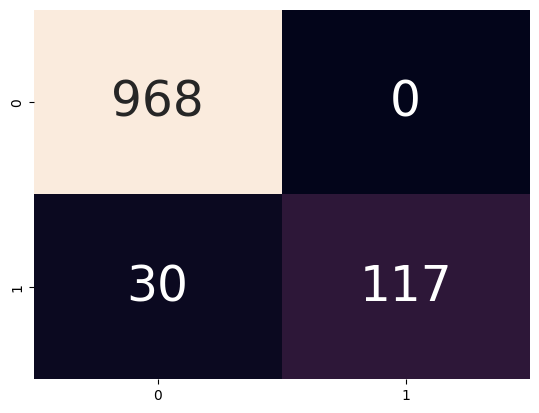

In [181]:
sns.heatmap(cmAng, annot=True, cbar=False, fmt='d',annot_kws={"size":35})

<Axes: >

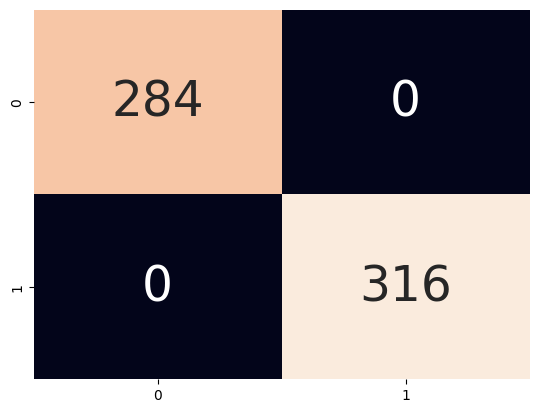

In [182]:
sns.heatmap(cmAb, annot=True, cbar=False, fmt='d',annot_kws={"size":35})

<Axes: >

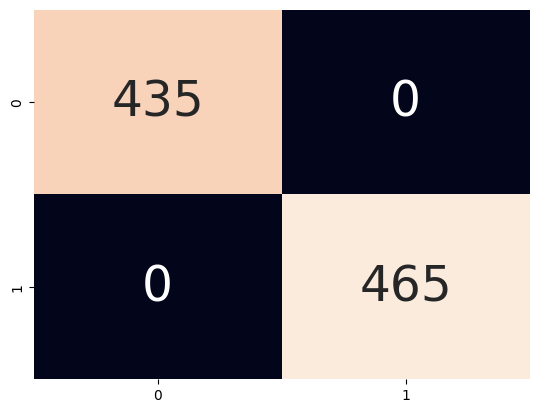

In [183]:
sns.heatmap(cmFr, annot=True, cbar=False, fmt='d',annot_kws={"size":35})

In [184]:
import joblib


joblib.dump(modelAng, "spam_modelAng.pkl")  
joblib.dump(modelAb, "spam_modelAb.pkl")  
joblib.dump(modelFr, "spam_modelFr.pkl")  

['spam_modelFr.pkl']

In [187]:
joblib.dump(vectorizerAb, "tfidf_Abvectorizer.pkl")
joblib.dump(vectorizerAng, "tfidf_Angvectorizer.pkl")
joblib.dump(vectorizerFr, "tfidf_Frvectorizer.pkl")

['tfidf_Frvectorizer.pkl']

In [190]:
Ang_CountVec.shape

(5572, 8023)